# Forecasting Fitness Data

### Table of Contents:
* [Init Env](#init_env)
* [Graph Data](#graph_data)
* [Forecast Data](#forecast_data)

***
### Init Env <a class="anchor" id="init_env"></a>

In [75]:
import os, sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import dates
import datetime

sns.set(style="darkgrid")
%matplotlib inline

In [76]:
df = pd.read_excel("Workout_Tracker_Processed.xlsx")
#df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

print(df.shape)
df.info()

(85, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
Rotation          85 non-null int64
1RM               20 non-null object
Workout           85 non-null int64
Exercise          85 non-null object
Week              85 non-null float64
Sets              66 non-null float64
Reps              66 non-null object
Actual Lift       66 non-null object
Date              85 non-null datetime64[ns]
Time              85 non-null object
Bodyweight        63 non-null object
Notes             29 non-null object
calculated_1RM    66 non-null float64
Distance          19 non-null float64
Pace              19 non-null object
% 1RM             66 non-null object
Pace Numeric      19 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(9)
memory usage: 11.4+ KB


***
### Graph Data <a class="anchor" id="graph_data"></a>

c:\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


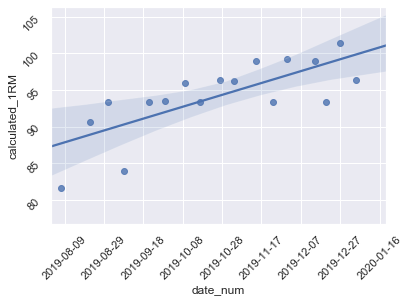

In [77]:
# method for graphing datetime into seaborn
exercise = 'Bench Press'
df_bp = df[df['Exercise']==exercise]

df_bp['date_str'] = df_bp['Date'].apply(
    lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')
)
df_bp['date_num'] = df_bp['date_str'].apply(
    lambda x: dates.datestr2num(x)
)


@plt.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')


# just use regplot if you don't need a FacetGrid
fig, ax = plt.subplots()
sns.regplot(
    'date_num', 
    'calculated_1RM', 
    data=df_bp, 
    ax=ax
)


# here's the magic:
ax.xaxis.set_major_formatter(fake_dates)

# legible labels
ax.tick_params(labelrotation=45)

x_min, x_max = df_bp['date_num'].min()-5, df_bp['date_num'].max()+15
y_min, y_max = df_bp['calculated_1RM'].min()-5, df_bp['calculated_1RM'].max()+5

ax.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max)
);

***
### Forecast Data <a class="anchor" id="forecast_data"></a>

In [78]:
# HWES example
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random

# fit model
model = ExponentialSmoothing(df_bp['calculated_1RM'])
model_fit = model.fit()

# make prediction
yhat = model_fit.predict(
    #len(df_bp['calculated_1RM']), len(df_bp['calculated_1RM'])
)
print(len(df_bp['calculated_1RM']))
print(yhat)

17
17    88.761034
dtype: float64


c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
c:\python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [79]:
# append data

new_entry = pd.DataFrame({
    "calculated_1RM" : yhat,
    "date_num" : df_bp['date_num'].max()+10
})
print(len(df_bp))
df_bp = df_bp.append(new_entry)
len(df_bp)

17


18

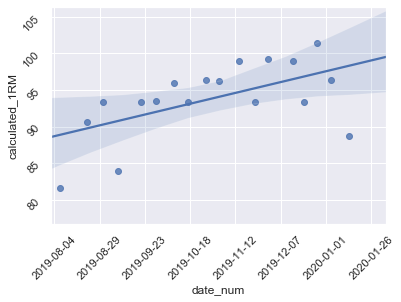

In [82]:
# method for graphing datetime into seaborn

#df_bp['date_str'] = df_bp['Date'].apply(
#    lambda x: datetime.datetime.strftime(x, '%Y-%m-%d')
#)
#df_bp['date_num'] = df_bp['date_str'].apply(
#    lambda x: dates.datestr2num(x)
#)


@plt.FuncFormatter
def fake_dates(x, pos):
    """ Custom formater to turn floats into e.g., 2016-05-08"""
    return dates.num2date(x).strftime('%Y-%m-%d')


# just use regplot if you don't need a FacetGrid
fig, ax = plt.subplots()
sns.regplot(
    'date_num', 
    'calculated_1RM', 
    data=df_bp, 
    ax=ax
)


# here's the magic:
ax.xaxis.set_major_formatter(fake_dates)

# legible labels
ax.tick_params(labelrotation=45)

x_min, x_max = df_bp['date_num'].min()-5, df_bp['date_num'].max()+20
y_min, y_max = df_bp['calculated_1RM'].min()-5, df_bp['calculated_1RM'].max()+5

ax.set(
    xlim=(x_min, x_max),
    ylim=(y_min, y_max)
);